<a href="https://colab.research.google.com/github/dnguyet06/B-i-t-p-AI/blob/main/v%C3%AD_d%E1%BB%A5_2_3%2C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 13.2 MB/s eta 0:00:00


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
#input
demand_level=ctrl.Antecedent(np.arange(0,3.1,0.1),'demand_level')
competitor_pricing=ctrl.Antecedent(np.arange(0,3.1,0.1),'competitor_pricing')
production_cost=ctrl.Antecedent(np.arange(0,3.1,0.1),'production_cost')
seasonality=ctrl.Antecedent(np.arange(0,3.1,0.1),'seasonality')
stock_level=ctrl.Antecedent(np.arange(0,3.1,0.1),'stock_level')
#output
price=ctrl.Consequent(np.arange(0,3.1,0.1),'price')


In [ ]:
demand_level['L']=fuzz.trimf(demand_level.universe,[0,0,1])
demand_level['M']=fuzz.trimf(demand_level.universe,[0,1,2])
demand_level['H']=fuzz.trimf(demand_level.universe,[1.2,2,3])
competitor_pricing['L']=fuzz.trimf(competitor_pricing.universe,[0,0,1])
competitor_pricing['M']=fuzz.trimf(competitor_pricing.universe,[0,1,2])
competitor_pricing['H']=fuzz.trimf(competitor_pricing.universe,[1.1,2,3])
production_cost['L']=fuzz.trimf(production_cost.universe,[0,0,1])
production_cost['M']=fuzz.trimf(production_cost.universe,[0,1,2])
production_cost['H']=fuzz.trimf(production_cost.universe,[1.5,2,3])
seasonality['OP']=fuzz.trimf(seasonality.universe,[0,0,1])
seasonality['N']=fuzz.trimf(seasonality.universe,[0,1,2])
seasonality['P']=fuzz.trimf(seasonality.universe,[1.4,2,3])
stock_level['L']=fuzz.trimf(stock_level.universe,[0,0,1])
stock_level['M']=fuzz.trimf(stock_level.universe,[0,1,2])
stock_level['H']=fuzz.trimf(stock_level.universe,[1.4,2,3])
stock_level['VH']=fuzz.trimf(stock_level.universe,[2.1,3,3])
price['L']=fuzz.trimf(price.universe,[0,0.5,1])
price['M']=fuzz.trimf(price.universe,[0.5,1,2])
price['H']=fuzz.trimf(price.universe,[1.5,2,2.5])
price['VH']=fuzz.trimf(price.universe,[2.1,3,3])

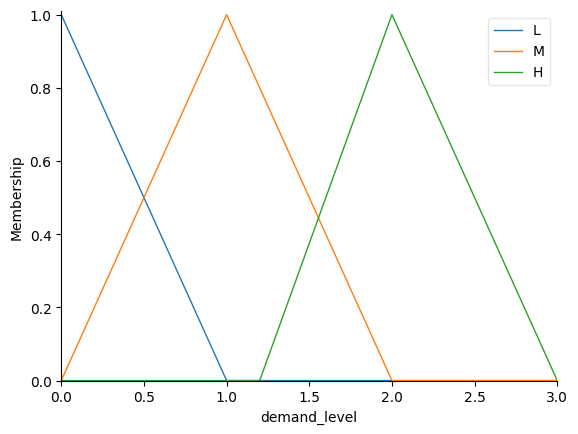

In [ ]:
demand_level.view()

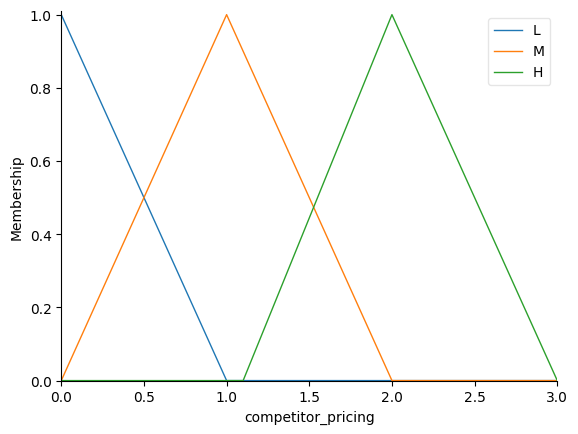

In [ ]:
competitor_pricing.view()

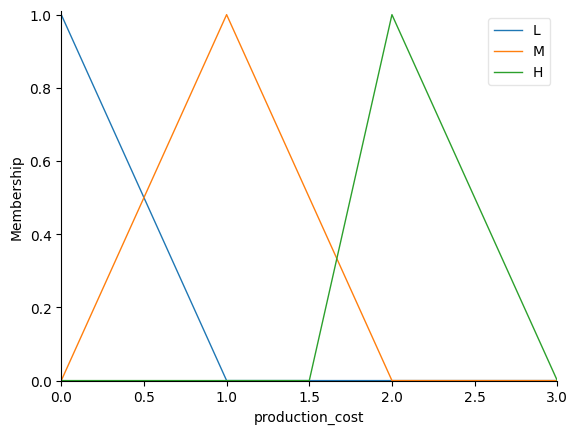

In [ ]:
production_cost.view()

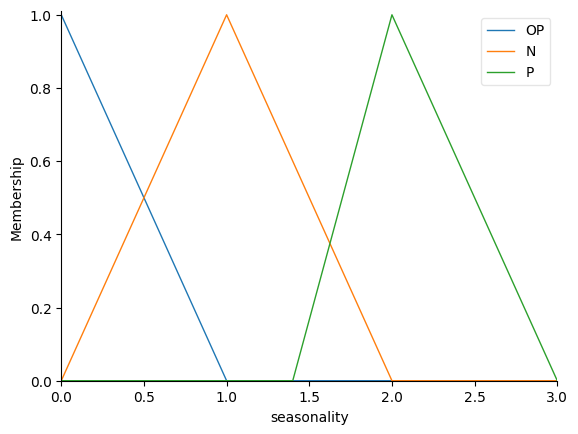

In [ ]:
seasonality.view()

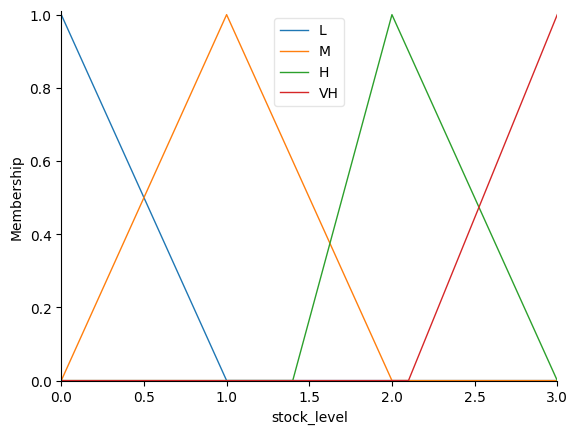

In [ ]:
stock_level.view()

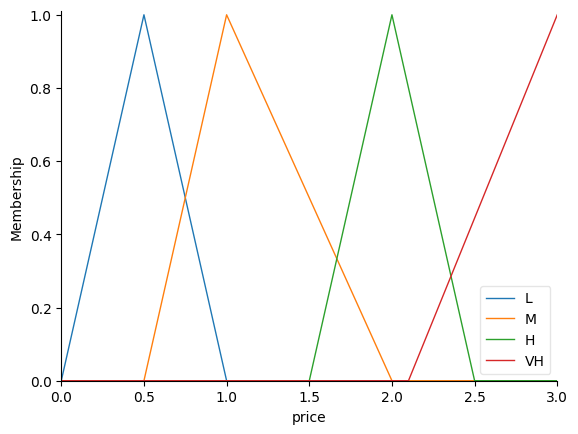

In [ ]:
price.view()

In [ ]:
#Luật
#Giá rất cao
rule1=ctrl.Rule(demand_level['H']&competitor_pricing['H']&stock_level['L'],price['VH'])
rule2=ctrl.Rule(demand_level['H']&seasonality['P']&stock_level['L'],price['VH'])
rule3=ctrl.Rule(demand_level['M']&production_cost['H']&stock_level['L'],price['VH'])
#Giá cao
rule4=ctrl.Rule(demand_level['H']&competitor_pricing['M']&stock_level['M'],price['H'])
rule5=ctrl.Rule(demand_level['M']&competitor_pricing['H']&stock_level['L'],price['H'])
rule6=ctrl.Rule(demand_level['H']&seasonality['P']&stock_level['M'],price['H'])
#Giá trung bình
rule7=ctrl.Rule(demand_level['M']&competitor_pricing['M']&stock_level['M'],price['M'])
rule8=ctrl.Rule(demand_level['L']&competitor_pricing['H']&stock_level['M'],price['M'])
rule9=ctrl.Rule(demand_level['M']&production_cost['M']&stock_level['M'],price['M'])
#Giá thấp
rule10=ctrl.Rule(demand_level['L']&competitor_pricing['L']&stock_level['M'],price['L'])
rule11=ctrl.Rule(demand_level['M']&production_cost['L']&stock_level['H'],price['L'])
rule12=ctrl.Rule(demand_level['L']&seasonality['OP']&stock_level['H'],price['L'])
#Giá rất thấp
rule13=ctrl.Rule(demand_level['L']&competitor_pricing['L']&stock_level['H'],price['VH'])
rule14=ctrl.Rule(demand_level['L']&seasonality['OP']&stock_level['H'],price['VH'])
rule15=ctrl.Rule(demand_level['M']&competitor_pricing['L']&stock_level['H'],price['VH'])

0.49999999999999994


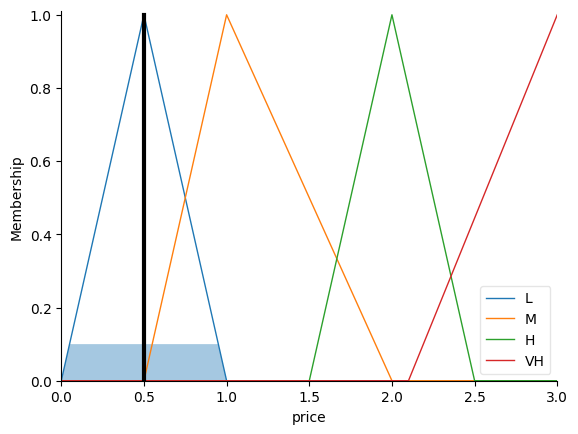

In [ ]:
pricing_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15])
sim=ctrl.ControlSystemSimulation(pricing_ctrl)
sim.input['demand_level']=1.5
sim.input['competitor_pricing']=2
sim.input['production_cost']=0.9
sim.input['seasonality']=3
sim.input['stock_level']=2.5
sim.compute()
print(sim.output['price'])
price.view(sim)